# Problem1. Regression

## (a) 데이터를 불러온 후 처음 4줄을 출력하시오.

In [1]:
import pandas as pd

regression_data=pd.read_csv("C:/Users/User/Desktop/2024-1/빅분방/regression_data.csv")
regression_data.head(4)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562


## (b) Scatter plot(pair plot)을 그리고 그 결과에 대해 논하시오.

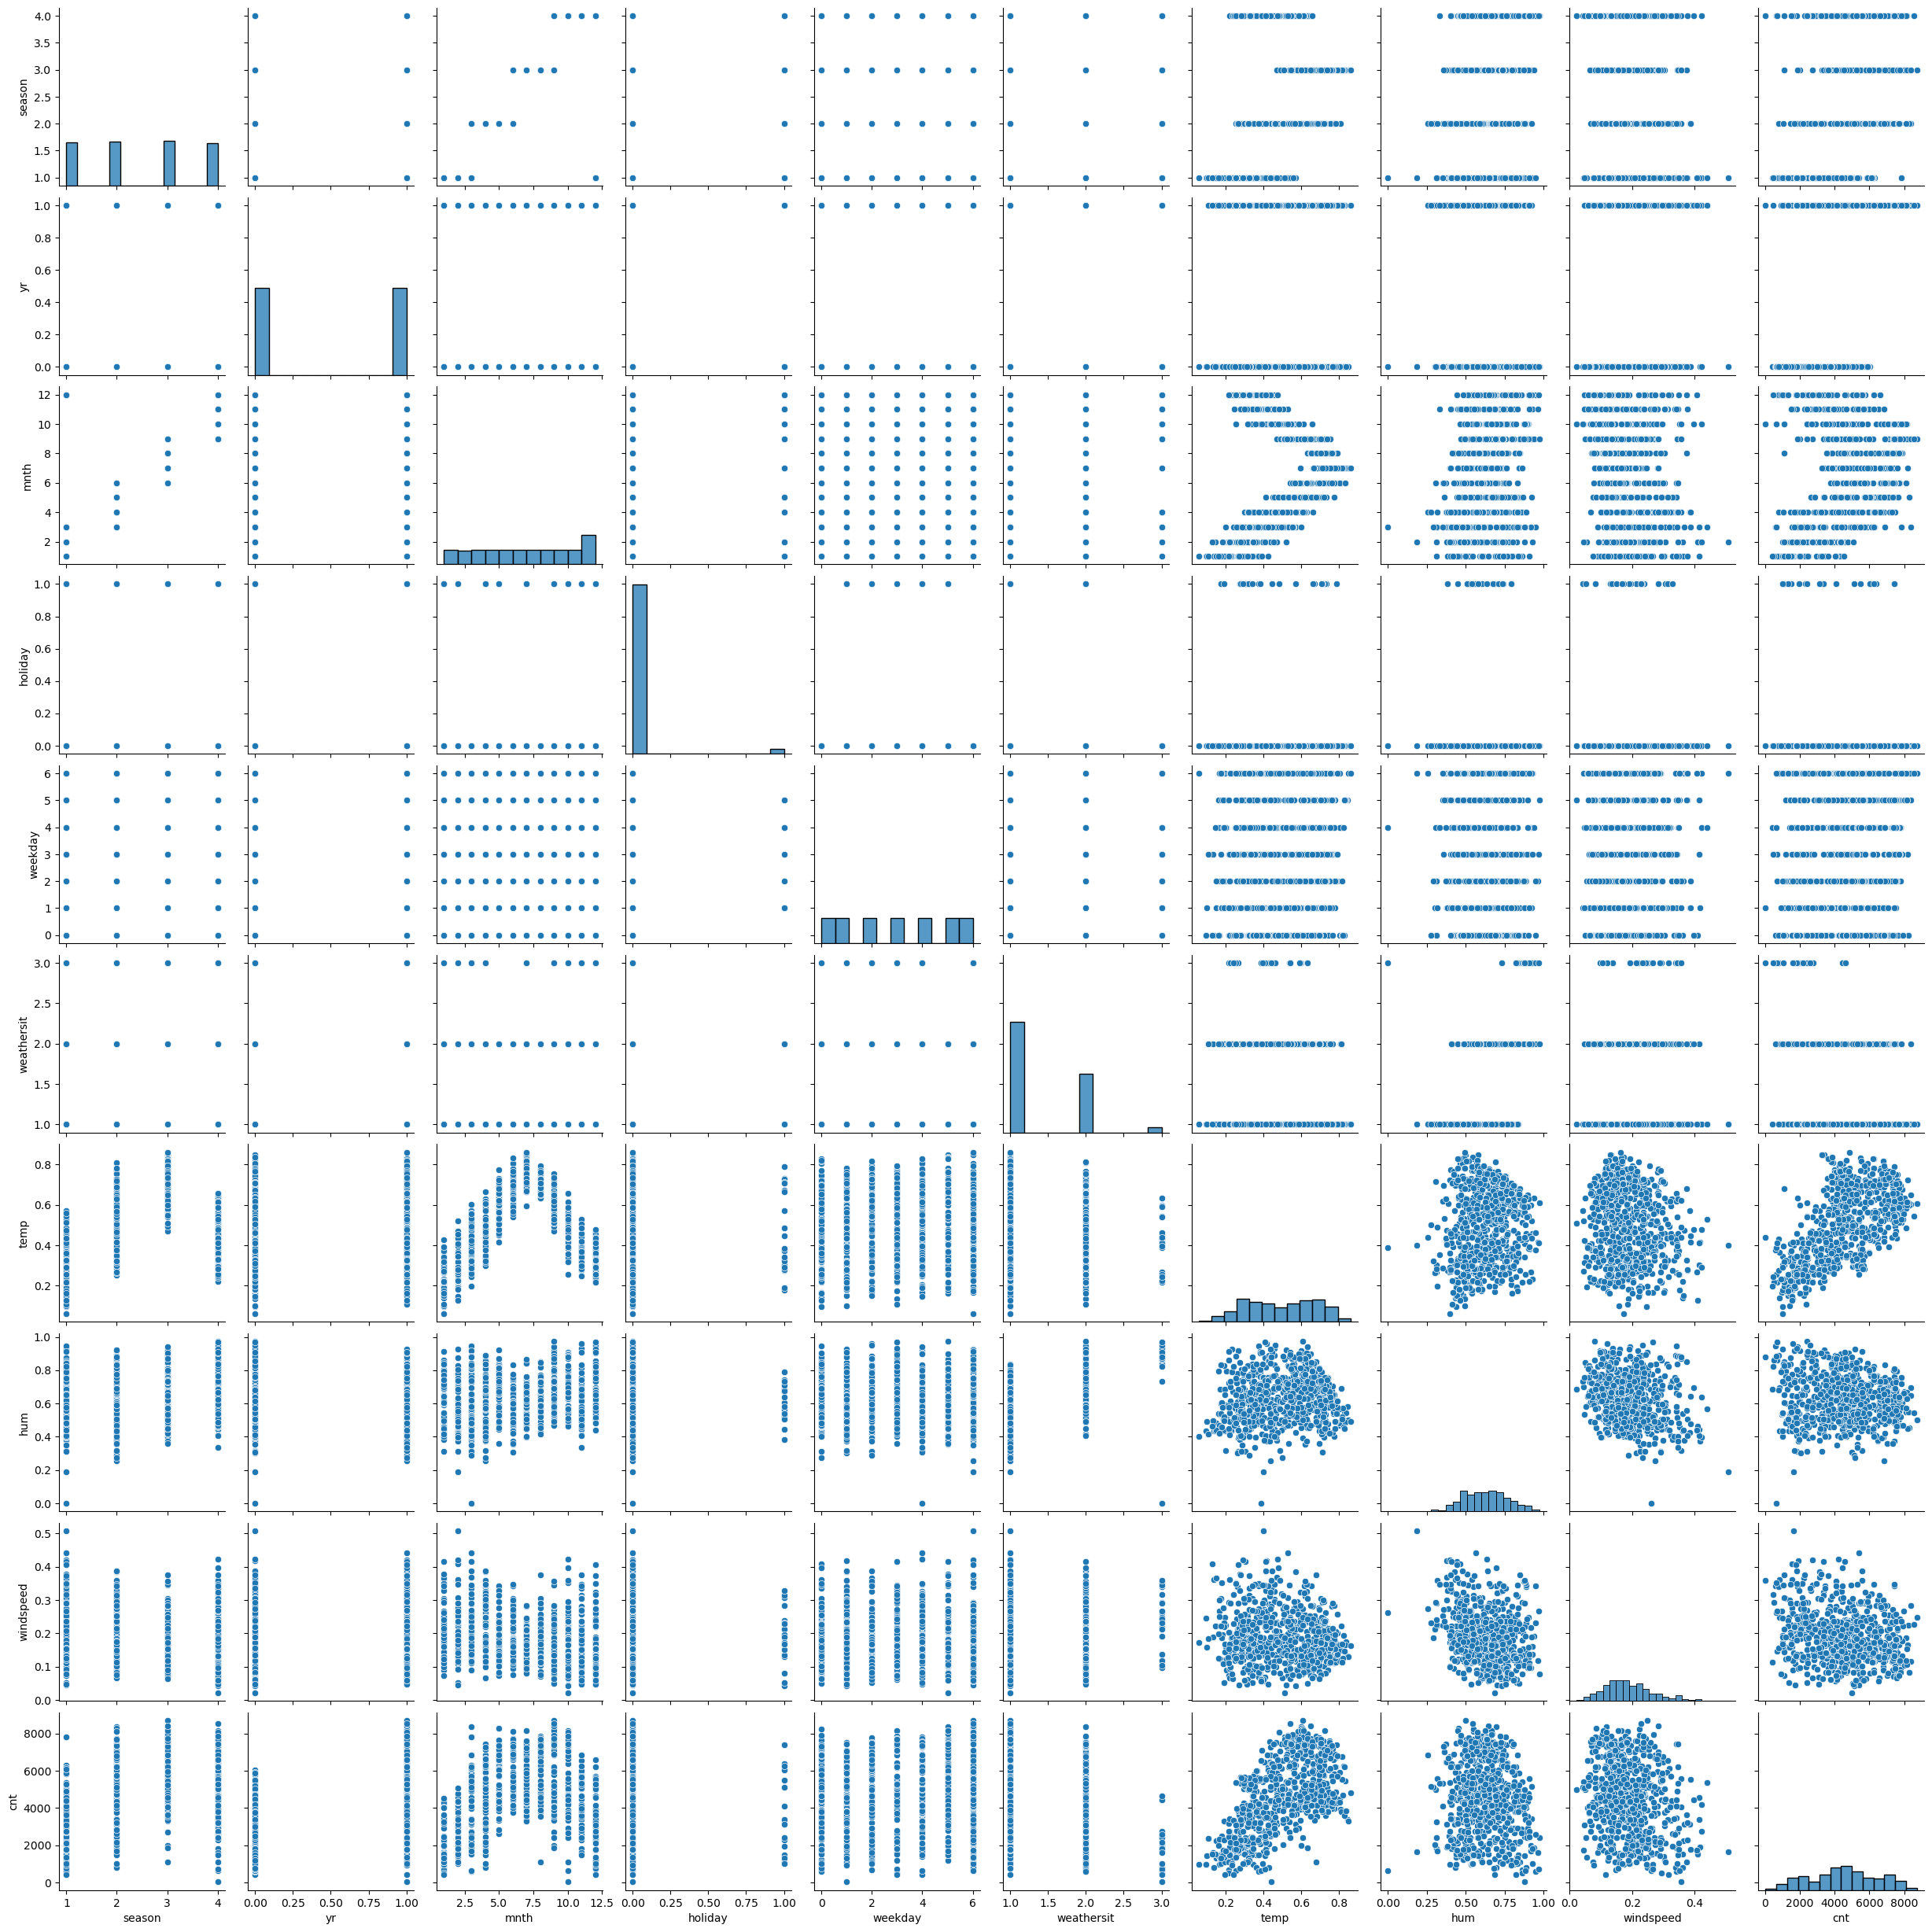

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.pairplot(regression_data)

1. target인 cnt와 temp에서 약한 선형성이 관찰된다.
2. season, yr, mnth, holiday, weekday, weathersit은 범주형 변수가 라벨인코딩된 변수이다.
3. temp, hum, windspeed는 연속형 변수이다.
5. 2012년에 대여량이 증가했다.
6. 12월~2월에 자전거 대여량이 비교적 적다.

## (c) 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.

In [3]:
regression_data_new=regression_data.copy()

# one-hot encoding : season, yr, mnth, holiday, weekday, weathersit은 모두 label encoding되어 있으므로 one-hot encoding으로 바꿔준다. (각 숫자를 순서로 인식하여 모델링이 원하는 방향으로 되지 않을 수 있기 때문)
import pandas as pd

regression_data_new=pd.get_dummies(data=regression_data_new, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], prefix=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'], dtype=int)

## (d) Data를 x(feature), y(target)로 분리하시오.

In [4]:
x=regression_data_new.loc[:, regression_data_new.columns!='cnt']
y=regression_data_new['cnt']

## (e) Data를 train/test data로 split하시오. (train:test=3:1, random seed=777)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=777)

## (f) MLR, regression tree, Gradient Boosting, XGBoost에 대하여 model fitting 후 다음 표를 작성하시오. (각 model의 hyperparameter 설정을 반드시 지킬 것)

* regression tree option : max_depth=3
* Gradient Boosting hyperparameter option : max_depth=3, n_estimator=200, learning_rate=0.1, random_state=777
* XGBoost hyperparameter option : max_depth=3, n_estimator=200, learning_rate=0.1, random_state=777

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
# MLR
mlr=LinearRegression()
mlr.fit(x_train, y_train)
y_pred_mlr=mlr.predict(x_test)

rs=r2_score(y_pred_mlr, y_test)
MSE=mean_squared_error(y_test, y_pred_mlr)
print(f'r2 score : {rs}, MSE : {MSE}')

r2 score : 0.7619167417134636, MSE : 773554.3715846995


In [8]:
# regression tree
from sklearn.tree import DecisionTreeRegressor

rt=DecisionTreeRegressor(max_depth=3)
rt.fit(x_train, y_train)
y_pred_rt=rt.predict(x_test)

rs=r2_score(y_pred_rt, y_test)
MSE=mean_squared_error(y_test, y_pred_rt)
print(f'r2 score : {rs}, MSE : {MSE}')

r2 score : 0.6968817221713822, MSE : 860225.7464696094


In [9]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gbt=GradientBoostingRegressor(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
gbt.fit(x_train, y_train)
y_pred_gbt=gbt.predict(x_test)

rs=r2_score(y_pred_gbt, y_test)
MSE=mean_squared_error(y_test, y_pred_gbt)
print(f'r2 score : {rs}, MSE : {MSE}')

r2 score : 0.8722938217692289, MSE : 408907.0962488063


In [10]:
# xgboost
import xgboost

xgb=xgboost.XGBRegressor(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
xgb.fit(x_train, y_train)
y_pred_xgb=xgb.predict(x_test)

rs=r2_score(y_pred_xgb, y_test)
MSE=mean_squared_error(y_test, y_pred_xgb)
print(f'r2 score : {rs}, MSE : {MSE}')

r2 score : 0.8792224627705907, MSE : 384743.1215142426


||$R^2$|MSE|
|------|---|---|
|MLR|0.7619167417134636|773554.3715846995|
|Regression tree|0.6968817221713822|860225.7464696094|
|Gradient Boosting|0.8722938217692289|408907.0962488063|
|XGBoost|0.8792224627705907|384743.1215142426|

## (g) (e)의 결과에 대하여 모델별로 $Y$ vs. $Y_{hat}$ plot을 그리시오. (코드와 그림을 함께 첨부할 것)

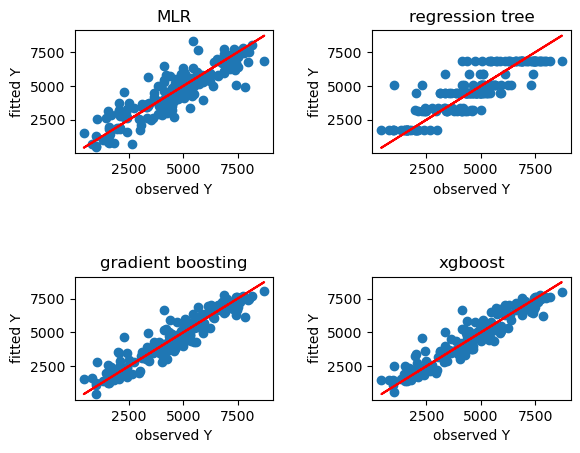

In [11]:
plt.subplots_adjust(hspace=1, wspace=0.5)

plt.subplot(221)
plt.scatter(y_test, y_pred_mlr)
plt.plot(y_test, y_test, color='r', label='y=x') ## y=x 직선
plt.title('MLR')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')

plt.subplot(222)
plt.scatter(y_test, y_pred_rt)
plt.plot(y_test, y_test, color='r', label='y=x') ## y=x 직선
plt.title('regression tree')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')

plt.subplot(223)
plt.scatter(y_test, y_pred_gbt)
plt.plot(y_test, y_test, color='r', label='y=x') ## y=x 직선
plt.title('gradient boosting')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')

plt.subplot(224)
plt.scatter(y_test, y_pred_xgb)
plt.plot(y_test, y_test, color='r', label='y=x') ## y=x 직선
plt.title('xgboost')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')

plt.show()

## (h) 어떤 모델의 성능이 가장 좋은지 서술하시오.

* y와 y hat이 $y=x$ 위에 분포되어 있으므로 model이 예측값을 잘 추정하고 있음을 확인할 수 있다.
* $R^2$ 값은 xgboost가 가장 높게 나왔으므로, xgboost가 성능이 가장 좋다.
* MSE 값 또한 xgboost가 가장 작게 나왔으므로, xgboost가 성능이 가장 좋다.

# Problem 2. Classification

## (a) 데이터를 불러온 후 처음 4줄을 출력하시오.

In [12]:
classification_data=pd.read_csv("C:/Users/User/Desktop/2024-1/빅분방/classification_data.csv", sep=';')
classification_data.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [13]:
mycfdata=classification_data.drop('duration', axis=1)
mycfdata.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no


## (b) Categorical variable에 대해 histogram을 그리고 그 결과에 대해 논하시오.

In [14]:
mycfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.3+ KB


Text(0, 0.5, 'Frequency')

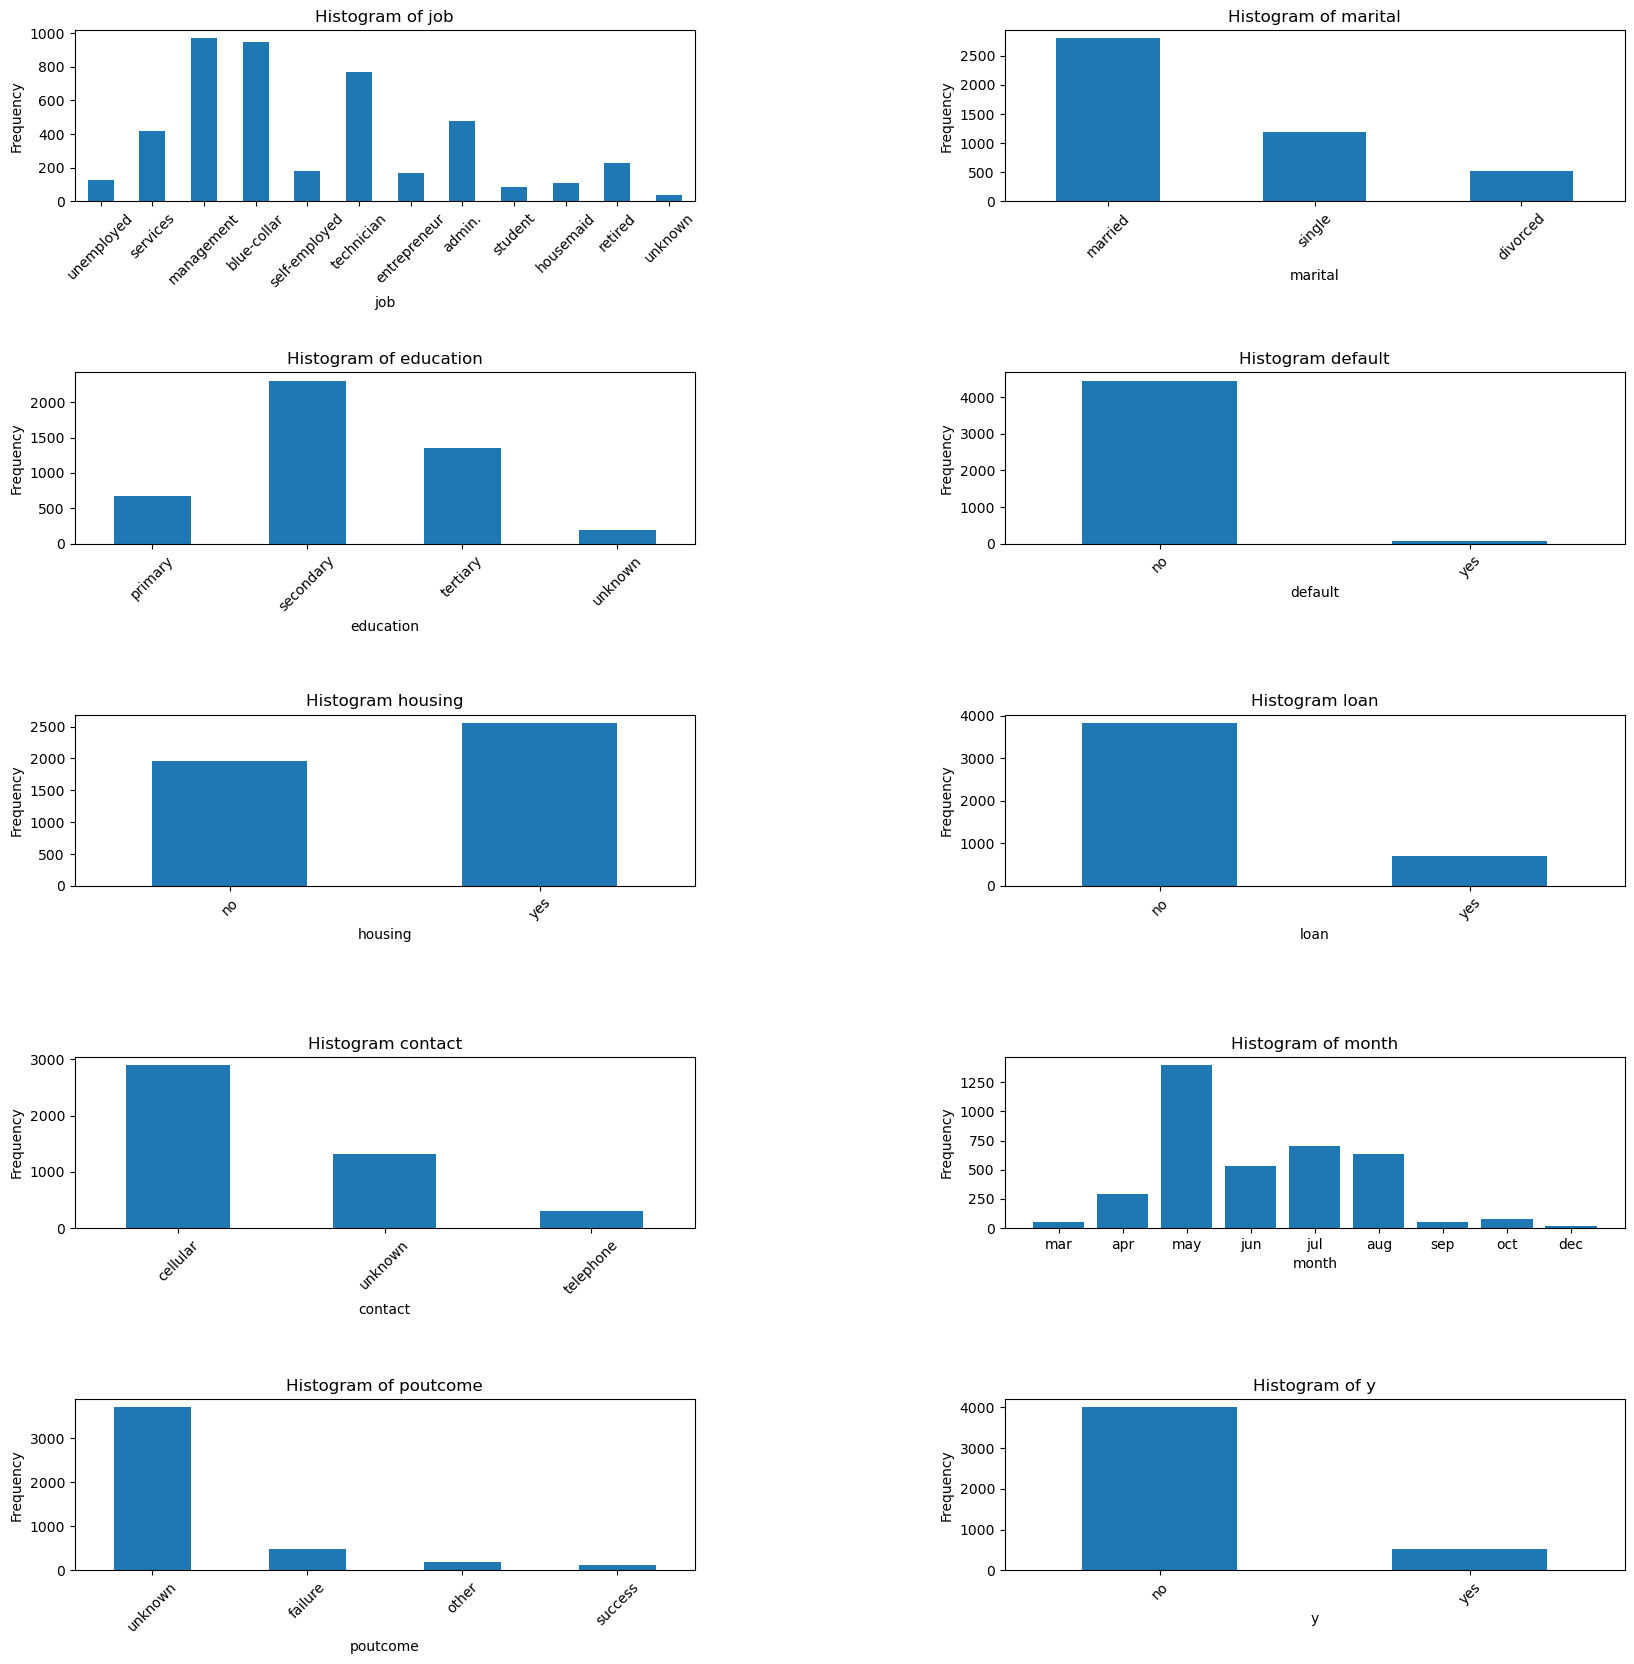

In [15]:
## categorical variable : job, marital, education, default, housing, loan, contact, month, poutcome, y
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1, wspace=0.5)

plt.subplot(521)
mycfdata['job'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of job')
plt.xlabel('job')
plt.ylabel('Frequency')

plt.subplot(522)
mycfdata['marital'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of marital')
plt.xlabel('marital')
plt.ylabel('Frequency')

plt.subplot(523)
mycfdata['education'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of education')
plt.xlabel('education')
plt.ylabel('Frequency')

plt.subplot(524)
mycfdata['default'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram default')
plt.xlabel('default')
plt.ylabel('Frequency')

plt.subplot(525)
mycfdata['housing'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram housing')
plt.xlabel('housing')
plt.ylabel('Frequency')

plt.subplot(526)
mycfdata['loan'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram loan')
plt.xlabel('loan')
plt.ylabel('Frequency')

plt.subplot(527)
mycfdata['contact'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram contact')
plt.xlabel('contact')
plt.ylabel('Frequency')

plt.subplot(528)
month_order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'dec']
df_month=mycfdata['month'].value_counts()
df_month=df_month.loc[month_order]
plt.bar(df_month.index, df_month.values)
plt.title('Histogram of month')
plt.xlabel('month')
plt.ylabel('Frequency')

plt.subplot(529)
mycfdata['poutcome'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency')

plt.subplot(5,2,10)
mycfdata['y'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')

* job : management와 bule-collar가 많다.
* marital : 결혼한 사람들이 현저히 많다.
* education : secondary가 가장 많다.
* credit을 default로 가지고 있는 사람이 현저히 적다.
* housing : yes가 더 높다.
* loan : no가 현저히 높다.
* contact : cellular이 가장 많다.
* month : 5월이 눈에 띄게 높다.
* poutcome : unknown이 가장 높다.
* target인 y는 no가 yes에 비해 현저히 높은, biased 변수이다.

## (c) 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.

In [16]:
## one-hot encoding
mycfdata_new=mycfdata.copy()

import pandas as pd

mycfdata_new=pd.get_dummies(data=mycfdata_new, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], prefix=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], dtype=int)

In [17]:
## label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
mycfdata_new['y']=le.fit_transform(mycfdata_new['y'].values)

## (d) Data를 X(feature), y(target)으로 분리하시오.

In [18]:
Y=mycfdata_new['y']
mycfdata_new.pop('y')
X=mycfdata_new.iloc[:, :]

## (e) Data를 train/test로 split 하시오. (train:test=3:1, random_seed=777)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=777)

## (f) Decision tree, Gradient Boosting, XGBoost, Bagging, Random Forest에 대하여 model fitting 후 다음 표를 작성하시오.

- max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777

In [20]:
## decision tree
from sklearn.tree import DecisionTreeClassifier

dtcf=DecisionTreeClassifier(max_depth=3, random_state=777)
dtcf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=777)

In [21]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbcf=GradientBoostingClassifier(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=777)
gbcf.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=200, random_state=777)

In [22]:
## XGBoost
import xgboost
xgbcf=xgboost.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
xgbcf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=777, ...)

In [23]:
## Bagging
from sklearn.ensemble import BaggingClassifier

bcf=BaggingClassifier(n_estimators = 200, random_state = 777)
bcf.fit(X_train, Y_train)

BaggingClassifier(n_estimators=200, random_state=777)

In [24]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

rfcf=RandomForestClassifier(max_depth = 3, n_estimators = 200, random_state = 777)
rfcf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=777)

In [25]:
from sklearn.metrics import accuracy_score

Y_pred_dtcf=dtcf.predict(X_test)
print(f'dt : {accuracy_score(Y_test, Y_pred_dtcf)}')

Y_pred_gbcf=gbcf.predict(X_test)
print(f'gb : {accuracy_score(Y_test, Y_pred_gbcf)}')

Y_pred_xgbcf=xgbcf.predict(X_test)
print(f'xgb : {accuracy_score(Y_test, Y_pred_xgbcf)}')

Y_pred_bcf=bcf.predict(X_test)
print(f'b : {accuracy_score(Y_test, Y_pred_bcf)}')

Y_pred_rfcf=rfcf.predict(X_test)
print(f'rf : {accuracy_score(Y_test, Y_pred_rfcf)}')

dt : 0.8947833775419982
gb : 0.8824049513704686
xgb : 0.8903625110521662
b : 0.8824049513704686
rf : 0.896551724137931


||DT|GB|XGB|Bagging|RF|
|-----|-----|-----|-----|-----|-----|
|Accuracy|0.8947833775419982|0.8824049513704686|0.8903625110521662|0.8824049513704686|0.896551724137931|

## (g) (e)의 결과에 대하여 모델별로 confusion matrix를 구하시오.

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
mtx1=confusion_matrix(Y_test, Y_pred_dtcf)
label=['No', 'Yes']
table1=pd.DataFrame(mtx1, columns=label, index=label)
table1

,No,Yes
No,998,16
Yes,103,14


In [28]:
mtx2=confusion_matrix(Y_test, Y_pred_gbcf)
label=['No', 'Yes']
table2=pd.DataFrame(mtx2, columns=label, index=label)
table2

,No,Yes
No,984,30
Yes,103,14


In [29]:
mtx3=confusion_matrix(Y_test, Y_pred_xgbcf)
label=['No', 'Yes']
table3=pd.DataFrame(mtx3, columns=label, index=label)
table3

,No,Yes
No,992,22
Yes,102,15


In [30]:
mtx4=confusion_matrix(Y_test, Y_pred_bcf)
label=['No', 'Yes']
table4=pd.DataFrame(mtx4, columns=label, index=label)
table4

,No,Yes
No,985,29
Yes,104,13


In [31]:
mtx5=confusion_matrix(Y_test, Y_pred_rfcf)
label=['No', 'Yes']
table5=pd.DataFrame(mtx5, columns=label, index=label)
table5

,No,Yes
No,1014,0
Yes,117,0


## (h) 어떤 모델의 성능이 가장 좋은지 서술하시오.

* accuracy가 가장 높은 모델은 random forest이다. 하지만 confusion matrix를 관찰했을 때, 고객이 정기예금에 가입했는데, yes로 예측한 경우가 0이기 때문에 가장 성능이 좋다고 할 수 없다.
* confusion matrix를 관찰했을 때 성능이 가장 좋은 모델은 xgboost이다.

In [32]:
!jupyter nbconvert --to html "2053001_김다정.ipynb"

[NbConvertApp] Converting notebook 2053001_김다정.ipynb to html
[NbConvertApp] Writing 357445 bytes to 2053001_김다정.html
